In [60]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.image as mpimg

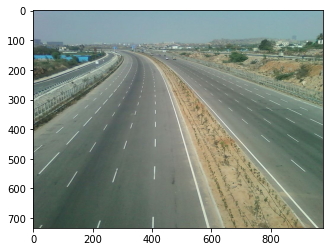

In [61]:
lane = cv2.imread(r'Images\lane.jpg')
plt.imshow(cv2.cvtColor(lane,cv2.COLOR_BGR2RGB))

In [62]:
lane_laplace = cv2.Laplacian(lane,cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


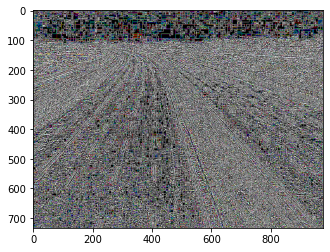

In [63]:
plt.imshow(lane_laplace)

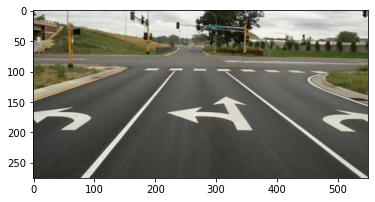

In [64]:
lane_image = cv2.imread(r'Images\lane2.jpg')
plt.imshow(cv2.cvtColor(lane_image,cv2.COLOR_BGR2RGB))

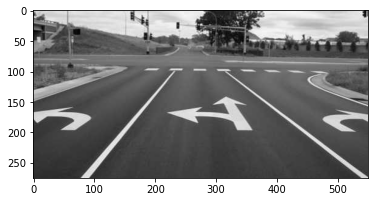

In [65]:
lane_gray = cv2.cvtColor(lane_image,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(lane_gray,cv2.COLOR_BGR2RGB))

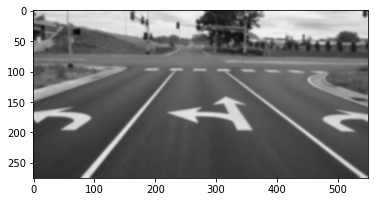

In [66]:
blur = cv2.GaussianBlur(lane_gray,(7,7),0)
plt.imshow(cv2.cvtColor(blur,cv2.COLOR_BGR2RGB))

(275, 550)

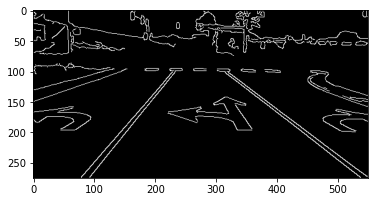

In [67]:
canny = cv2.Canny(blur,10,200)
plt.imshow(cv2.cvtColor(canny,cv2.COLOR_BGR2RGB))
canny.shape

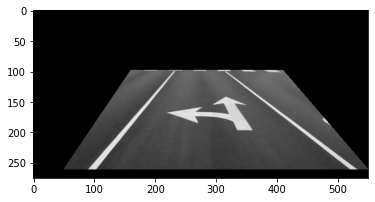

In [68]:
vertices = np.array([[(50,260),(160,98),(410,98),(550,260)]],dtype=np.int32)
mask = np.zeros_like(lane_gray)
cv2.fillPoly(mask,vertices,255)
masked_image = cv2.bitwise_and(lane_gray,mask)
plt.figure()
plt.imshow(cv2.cvtColor(masked_image,cv2.COLOR_BGR2RGB))

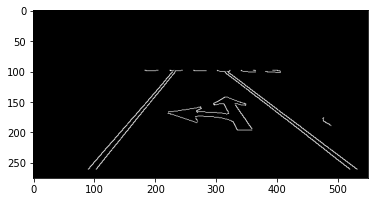

In [69]:
masked_image = cv2.bitwise_and(canny,mask)
plt.figure()
plt.imshow(cv2.cvtColor(masked_image,cv2.COLOR_BGR2RGB))

In [70]:
rho = 2
theta = np.pi/100
threshold = 170
min_line_len = 100
max_line_gap = 50

lines = cv2.HoughLinesP(masked_image,rho,theta,threshold,np.array([]),min_line_len,max_line_gap)

lines_image = np.zeros((masked_image.shape[0],masked_image.shape[1],3),dtype=np.uint8)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(lines_image,(x1,y1),(x2,y2),[0,0,255],20)
lines

array([[[103, 260, 236,  99]],

       [[313, 100, 520, 260]],

       [[401, 163, 503, 238]],

       [[ 90, 260, 214, 119]]], dtype=int32)

In [71]:
a = 1
b = 1
g = 0

image_with_lines = cv2.addWeighted(lane_image,a,lines_image,b,g)

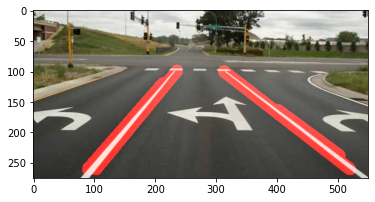

In [73]:
plt.figure()
plt.imshow((cv2.cvtColor(image_with_lines,cv2.COLOR_BGR2RGB)))